In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [6]:
# Define data directories
train_dir = "/home/arush/GW_Test_1/Model_Training/Data_v3/train"
val_dir = "/home/arush/GW_Test_1/Model_Training//Data_v3/validation"
test_dir = "/home/arush/GW_Test_1/Model_Training/Data_v3/test"

# Define image size and batch size
img_size = (224, 224)
batch_size = 32

# Preprocess images and create data generators
train_datagen = ImageDataGenerator(rescale=1.0 / 255)
val_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=img_size, batch_size=batch_size, class_mode="categorical"
)

val_generator = val_datagen.flow_from_directory(
    val_dir, target_size=img_size, batch_size=batch_size, class_mode="categorical"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False,  # Do not shuffle test data
)


Found 16135 images belonging to 6 classes.
Found 2006 images belonging to 6 classes.
Found 2030 images belonging to 6 classes.


In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense

# Model Structure
model = Sequential()
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(1024, activation="relu"))
model.add(Dense(6, activation="softmax"))
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

/home/arush/anaconda3/envs/python39_1/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [8]:
# Model Training
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
)

Epoch 1/10


/home/arush/anaconda3/envs/python39_1/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


504/504 ━━━━━━━━━━━━━━━━━━━━ 795s 2s/step - accuracy: 0.2880 - loss: 1.5663 - val_accuracy: 0.6295 - val_loss: 0.8169
Epoch 2/10
  1/504 ━━━━━━━━━━━━━━━━━━━━ 11:40 1s/step - accuracy: 0.6562 - loss: 0.7302

2024-04-25 00:08:13.873897: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/home/arush/anaconda3/envs/python39_1/lib/python3.9/contextlib.py:137: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


504/504 ━━━━━━━━━━━━━━━━━━━━ 2s 491us/step - accuracy: 0.6562 - loss: 0.3658 - val_accuracy: 0.5909 - val_loss: 0.4235
Epoch 3/10


2024-04-25 00:08:14.104606: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


504/504 ━━━━━━━━━━━━━━━━━━━━ 741s 1s/step - accuracy: 0.7080 - loss: 0.6447 - val_accuracy: 0.7606 - val_loss: 0.5462
Epoch 4/10
  1/504 ━━━━━━━━━━━━━━━━━━━━ 11:39 1s/step - accuracy: 0.7188 - loss: 0.5524

2024-04-25 00:20:36.853676: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


504/504 ━━━━━━━━━━━━━━━━━━━━ 2s 468us/step - accuracy: 0.7188 - loss: 0.2767 - val_accuracy: 0.8182 - val_loss: 0.2030
Epoch 5/10


2024-04-25 00:20:37.079037: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


504/504 ━━━━━━━━━━━━━━━━━━━━ 796s 2s/step - accuracy: 0.8063 - loss: 0.4437 - val_accuracy: 0.8014 - val_loss: 0.4329
Epoch 6/10
  1/504 ━━━━━━━━━━━━━━━━━━━━ 12:29 1s/step - accuracy: 0.6562 - loss: 0.5865

2024-04-25 00:33:54.097360: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-25 00:33:54.298886: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


504/504 ━━━━━━━━━━━━━━━━━━━━ 2s 419us/step - accuracy: 0.6562 - loss: 0.2938 - val_accuracy: 0.9545 - val_loss: 0.1508
Epoch 7/10
504/504 ━━━━━━━━━━━━━━━━━━━━ 761s 2s/step - accuracy: 0.8405 - loss: 0.3705 - val_accuracy: 0.8362 - val_loss: 0.3588
Epoch 8/10
  1/504 ━━━━━━━━━━━━━━━━━━━━ 11:25 1s/step - accuracy: 0.9688 - loss: 0.1870

2024-04-25 00:46:36.983325: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


504/504 ━━━━━━━━━━━━━━━━━━━━ 2s 436us/step - accuracy: 0.9688 - loss: 0.0937 - val_accuracy: 0.8182 - val_loss: 0.1938
Epoch 9/10


2024-04-25 00:46:37.193609: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


504/504 ━━━━━━━━━━━━━━━━━━━━ 725s 1s/step - accuracy: 0.8552 - loss: 0.3334 - val_accuracy: 0.8080 - val_loss: 0.4841
Epoch 10/10
  1/504 ━━━━━━━━━━━━━━━━━━━━ 11:52 1s/step - accuracy: 0.8125 - loss: 0.5265

2024-04-25 00:58:44.086497: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


504/504 ━━━━━━━━━━━━━━━━━━━━ 2s 425us/step - accuracy: 0.8125 - loss: 0.2638 - val_accuracy: 0.9545 - val_loss: 0.1272


2024-04-25 00:58:44.290489: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


[]

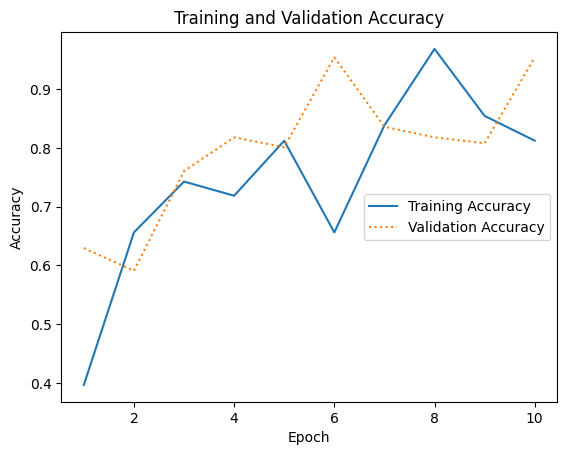

In [9]:
import matplotlib.pyplot as plt

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "-", label="Training Accuracy")
plt.plot(epochs, val_acc, ":", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc="right")
plt.plot()



In [12]:
print(acc)

[0.39650997519493103, 0.65625, 0.742842972278595, 0.71875, 0.8123952150344849, 0.65625, 0.8387877941131592, 0.96875, 0.8546233773231506, 0.8125]


/home/arush/anaconda3/envs/python39_1/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


64/64 ━━━━━━━━━━━━━━━━━━━━ 24s 379ms/step


Text(108.24687499999997, 0.5, 'Actual SNR')

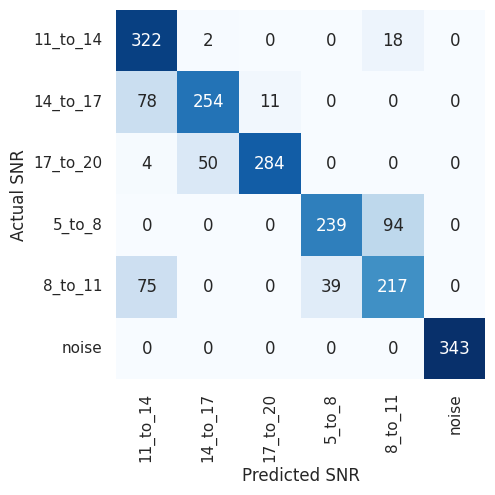

In [10]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

sns.set()

predictions = model.predict(
    test_generator, steps=int(np.ceil(test_generator.samples / batch_size))
)

# Get predicted labels
predicted_labels = np.argmax(predictions, axis=1)

# Get true labels
true_labels = test_generator.classes

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
classes = list(test_generator.class_indices.keys())
sns.heatmap(
    cm,
    square=True,
    annot=True,
    fmt="d",
    cbar=False,
    cmap="Blues",
    xticklabels=classes,
    yticklabels=classes,
)

plt.xlabel("Predicted SNR")
plt.ylabel("Actual SNR")

In [11]:
# model.save("model_v3_working.keras")